In [89]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [90]:
df = pd.read_csv(Path('df_8_30_2020.csv'))
df.set_index('Date',inplace = True)
df.tail()

,BTCUSDT,EOSUSDT,ETHUSDT,LINKUSDT,LTCUSDT
Date,,,,,
8/30/2020 23:24,11707.26,3.2443,429.48,16.6062,62.76
8/30/2020 23:25,11709.59,3.2431,429.32,16.5777,62.79
8/30/2020 23:26,11706.45,3.2393,428.99,16.5446,62.78
8/30/2020 23:27,11702.11,3.2379,428.30,16.5507,62.73
8/30/2020 23:28,11699.99,3.2376,NaN,NaN,62.72


In [91]:
independent = 'ETHUSDT'
dependent = 'BTCUSDT'

#def generate_signals(df,independent,dependent,multiplier,f_sample):
df = df.pct_change()
df = df.dropna()
df_insample = pd.DataFrame()
residuals2_mean = []
residuals2_std = []
f_sample = 50 #delete this one set upas function
result = []

In [92]:
#for n in range(f_sample): #f_sample is the out-of-sample data
df_insample = df.iloc[0 : len(df) - f_sample + n]
df_insample.tail()

,BTCUSDT,EOSUSDT,ETHUSDT,LINKUSDT,LTCUSDT
Date,,,,,
8/30/2020 22:34,0.000232,-0.000311,0.000662,0.000228,0.000162
8/30/2020 22:35,0.000783,0.000902,0.000520,0.000617,0.001132
8/30/2020 22:36,-0.000338,-0.000684,-0.000992,-0.000215,-0.000646
8/30/2020 22:37,-0.000115,-0.000529,-0.001702,-0.001131,-0.000485
8/30/2020 22:38,-0.000088,0.000218,0.000568,-0.000252,0.000323


In [93]:
#X = df.ETHUSDT.values.reshape(-1, 1)
#y = df.LTCUSDT
X = df_insample[independent].values.reshape(-1, 1)
y = df_insample[dependent]
model = LinearRegression()
X

array([[-0.00037927],
       [ 0.00065765],
       [-0.00040444],
       ...,
       [-0.00099197],
       [-0.00170221],
       [ 0.00056837]])

In [94]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
predicted_y_values = model.predict(X)
predicted_y_values

array([-0.00014877,  0.00024249, -0.00015826, ..., -0.00037995,
       -0.00064794,  0.0002088 ])

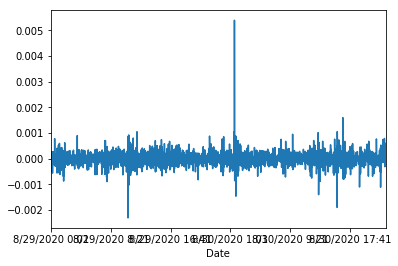

In [96]:
residuals = df_insample.loc[:,'BTCUSDT'] - predicted_y_values
residuals.plot()

In [97]:
model_AR = ARMA(residuals.values, order = (1,0))
results = model_AR.fit()
a = results.params[0]
b = results.params[1]
print(a)
print(b)

1.4096811795010356e-08
-0.10975985236327203


In [98]:
kappa = -np.log(b)
m = a / (1 - np.exp(-kappa))
residuals_shifted = residuals.shift()
residuals2 = residuals - (a + b*residuals_shifted)
residuals2_mean.append(residuals2.mean())
residuals2_std.append(residuals2.std())
sigma_epsilon = residuals2.std()
df_results = pd.DataFrame()

multiplier = 1 # delete for function


df_results['signal'] = np.where(residuals2 > multiplier*sigma_epsilon, -1.0, 0.0)
df_results['signal'] = np.where(residuals2 < -multiplier*sigma_epsilon, 1.0, 0.0)
result.append(df_results.iloc[-1])
    #return df_results['signal'].iloc[-1]

C:\Users\juanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [99]:
result
#generate_signals(df,independent,dependent,1,50)

[signal    0.0
 Name: 2797, dtype: float64]